In [7]:
import numpy as np
from hmmlearn.hmm import CategoricalHMM

In [8]:
hidden=["sunny","rainy"]
obs=['Walk', 'Indoor', 'Outdoor']

pi=np.array([1.0,0.0])
tm=np.array([[0.1, 0.9],
             [0.5, 0.5]])

em = np.array([[0.3, 0.5, 0.2],  # sunny emits Walk, Indoor, Outdoor
               [0.6, 0.2, 0.2]])
obs_seq=np.array([[2],[1],[0]])  #v3,v2,v1

obs_labels=[obs[i[0]] for i in obs_seq]
print(obs_labels)

n_states=len(hidden)
n_obs=len(obs)
n_samples=len(obs_seq)

['Outdoor', 'Indoor', 'Walk']


In [9]:
model=CategoricalHMM(n_components=n_states, n_features=n_obs, n_iter=0)
model.startprob_=pi
model.transmat_=tm
model.emissionprob_=em


In [10]:
#forward or Backward
logprob_fwd = model.score(obs_seq)


In [11]:
logprob, state_sequence = model.decode(obs_seq, algorithm="viterbi")
vit_states=[hidden[i] for i in state_sequence]

C:\Users\HP\AppData\Local\Temp\ipykernel_20436\3147152816.py:3: RuntimeWarning: divide by zero encountered in log
  log_startprob = np.log(model.startprob_)


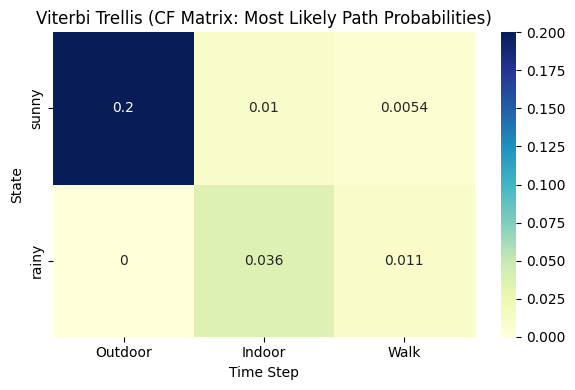


Observation sequence: ['Outdoor', 'Indoor', 'Walk']
Most likely states (Viterbi): ['sunny', 'rainy', 'rainy']
Log-likelihood (Forward): -3.8212686421596818


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
log_startprob = np.log(model.startprob_)
log_transmat = np.log(model.transmat_)
log_emit = model._compute_log_likelihood(obs_seq)

delta = np.zeros((n_samples, n_states))  # CF matrix (log space)
delta[0] = log_startprob + log_emit[0]  # Initialization

# Viterbi recurrence
for t in range(1, n_samples):
    for j in range(n_states):
        delta[t, j] = np.max(delta[t - 1] + log_transmat[:, j]) + log_emit[t, j]

# Convert to probability space for display
cf_matrix = np.exp(delta.T)  # shape: (states, time)

# Plot CF matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cf_matrix, annot=True, cmap="YlGnBu",
            xticklabels=obs_labels,
            yticklabels=hidden)
plt.title("Viterbi Trellis (CF Matrix: Most Likely Path Probabilities)")
plt.xlabel("Time Step")
plt.ylabel("State")
plt.tight_layout()
plt.show()

# Print results
print("\nObservation sequence:", obs_labels)
print("Most likely states (Viterbi):", vit_states)
print("Log-likelihood (Forward):", model.score(obs_seq))
